In [1]:
# First, install TensorFlow if not already installed
!pip install tensorflow

# Basic libraries
import numpy as np
import pandas as pd

# Data preprocessing
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


2025-09-04 12:41:29.182963: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-04 12:41:29.292736: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-04 12:41:33.726456: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [2]:
# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

print("Dataset Summary")
print("----------------------------")
print(f"Features shape (X): {X.shape}  -> {X.shape[0]} samples, {X.shape[1]} features")
print(f"Target shape (y):   {y.shape}  -> one label per sample")
print(f"Target classes:     {data.target_names.tolist()}")
print(f"Class distribution: {np.bincount(y)} (malignant={np.bincount(y)[0]}, benign={np.bincount(y)[1]})")
print(f"First 5 feature names: {data.feature_names[:5]}")

📊 Dataset Summary
----------------------------
Features shape (X): (569, 30)  -> 569 samples, 30 features
Target shape (y):   (569,)  -> one label per sample
Target classes:     ['malignant', 'benign']
Class distribution: [212 357] (malignant=212, benign=357)
First 5 feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness']


Dataset Shape: (569, 31)
Missing values: 0

Feature statistics (first 5 features):
       mean radius  mean texture  mean perimeter    mean area  mean smoothness
count   569.000000    569.000000      569.000000   569.000000       569.000000
mean     14.127292     19.289649       91.969033   654.889104         0.096360
std       3.524049      4.301036       24.298981   351.914129         0.014064
min       6.981000      9.710000       43.790000   143.500000         0.052630
25%      11.700000     16.170000       75.170000   420.300000         0.086370
50%      13.370000     18.840000       86.240000   551.100000         0.095870
75%      15.780000     21.800000      104.100000   782.700000         0.105300
max      28.110000     39.280000      188.500000  2501.000000         0.163400


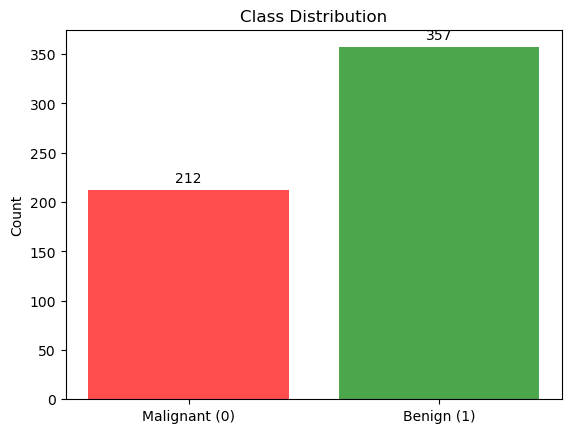


Data prepared successfully!
Train set shape: (455, 30)
Test set shape: (114, 30)


In [4]:
# Data Analysis
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

# 3. Quick checks
print("Dataset Shape:", df.shape)
print("Missing values:", df.isnull().sum().sum())
print("\nFeature statistics (first 5 features):")
print(df.describe().iloc[:, :5])

# 4. Plot class distribution
class_counts = np.bincount(y)
plt.bar(['Malignant (0)', 'Benign (1)'], class_counts, color=['red', 'green'], alpha=0.7)
plt.title('Class Distribution')
plt.ylabel('Count')
for i, count in enumerate(class_counts):
    plt.text(i, count + 5, str(count), ha='center', va='bottom')
plt.show()



In [18]:
!pip install tensorflow

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 5. Split into train/test sets (80/20) with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 6. Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("\nData prepared successfully!")
print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

# 7. Build Neural Network Model
model = Sequential([
    tf.keras.Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # output layer for binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model architecture
model.summary()

print("\nModel Architecture Explanation:")
print("- Input layer: 30 neurons (one for each feature)")
print("- Hidden layer 1: 64 neurons with ReLU activation")
print("- Hidden layer 2: 32 neurons with ReLU activation") 
print("- Hidden layer 3: 16 neurons with ReLU activation")
print("- Output layer: 1 neuron with sigmoid activation (binary classification)")
print("- Dropout layers: Randomly set some neurons to 0 during training to prevent overfitting")
print("- ReLU activation: f(x) = max(0, x) - introduces non-linearity")
print("- Sigmoid activation: f(x) = 1/(1 + e^(-x)) - outputs probability between 0 and 1\n")


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels

Data prepared successfully!
Train set shape: (455, 30)
Test set shape: (114, 30)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,609 (18.00 KB)

 Trainable params: 4,609 (18.00 KB)

 Non-trainable params: 0 (0.00 B)


Model Architecture Explanation:
- Input layer: 30 neurons (one for each feature)
- Hidden layer 1: 64 neurons with ReLU activation
- Hidden layer 2: 32 neurons with ReLU activation
- Hidden layer 3: 16 neurons with ReLU activation
- Output layer: 1 neuron with sigmoid activation (binary classification)
- Dropout layers: Randomly set some neurons to 0 during training to prevent overfitting
- ReLU activation: f(x) = max(0, x) - introduces non-linearity
- Sigmoid activation: f(x) = 1/(1 + e^(-x)) - outputs probability between 0 and 1



In [23]:
# 5. MODEL COMPILATION
# =====================
print("5. Setting up the model for training...")

model.compile(
    optimizer='adam',                # Optimizer: adjusts weights efficiently
    loss='binary_crossentropy',      # Loss: suitable for 2-class problems
    metrics=['accuracy']             # Metric: monitors correctness of predictions
)

print("→ Optimizer: Adam - smartly adapts the learning rate for faster convergence")
print("→ Loss Function: Binary Crossentropy - compares predicted probabilities vs true labels")
print("→ Evaluation Metric: Accuracy - shows the percentage of right predictions\n")

5. Setting up the model for training...
→ Optimizer: Adam - smartly adapts the learning rate for faster convergence
→ Loss Function: Binary Crossentropy - compares predicted probabilities vs true labels
→ Evaluation Metric: Accuracy - shows the percentage of right predictions



In [26]:
# TRAINING THE MODEL
# =====================
print("Model training in progress...")

# Define early stopping to avoid unnecessary overfitting
stopper = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)

# Train the model with validation split and callbacks
history = model.fit(
     X_train, y_train, 
    epochs=100,                 # run up to 100 rounds
    batch_size=32,              # update after 32 samples
    validation_split=0.2,       # keep aside 20% for validation
    verbose=1,                  # show detailed progress
    callbacks=[stopper]         # attach early stopping
)

print("\nModel training finished successfully!")
print("Used validation split for monitoring generalisation performance.")
print("Applied early stopping to restore the weights from the best epoch.\n")

Model training in progress...
Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7802 - loss: 0.5540 - val_accuracy: 0.8901 - val_loss: 0.4157
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8352 - loss: 0.4280 - val_accuracy: 0.9011 - val_loss: 0.2956
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9011 - loss: 0.3114 - val_accuracy: 0.9341 - val_loss: 0.2155
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9231 - loss: 0.2382 - val_accuracy: 0.9451 - val_loss: 0.1664
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9423 - loss: 0.2093 - val_accuracy: 0.9670 - val_loss: 0.1359
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9643 - loss: 0.1493 - val_accuracy: 0.9780 - val_loss: 0.1146
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9615 - loss: 0.1449 - val_accuracy: 0.9780 - val_loss: 0.0988
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9533 - loss: 

Plotting training performance...


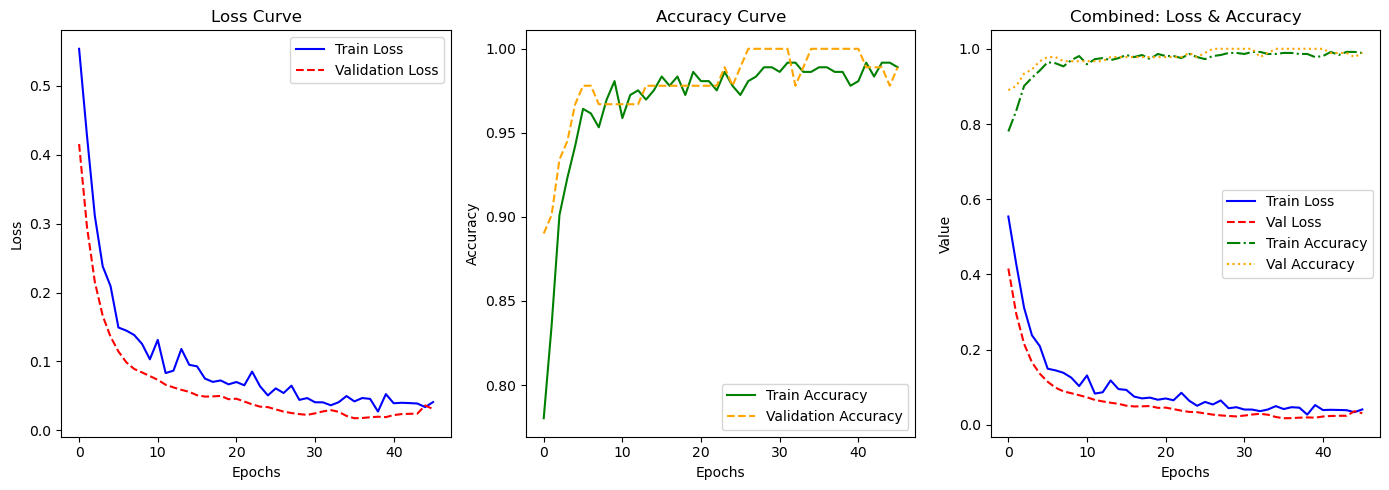

Graphs generated: Loss and Accuracy across epochs for both training and validation.



In [29]:
# PLOT TRAINING PERFORMANCE
# ============================
print("Plotting training performance...")
fig, axes = plt.subplots(1, 3, figsize=(14, 5))

# --- Loss curve ---
axes[0].plot(history.history["loss"], color="blue", linestyle="-", label="Train Loss")
axes[0].plot(history.history["val_loss"], color="red", linestyle="--", label="Validation Loss")
axes[0].set_title("Loss Curve")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
axes[0].legend()

# --- Accuracy curve ---
axes[1].plot(history.history["accuracy"], color="green", linestyle="-", label="Train Accuracy")
axes[1].plot(history.history["val_accuracy"], color="orange", linestyle="--", label="Validation Accuracy")
axes[1].set_title("Accuracy Curve")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Accuracy")
axes[1].legend()

# --- Combined view (Loss + Accuracy) ---
axes[2].plot(history.history["loss"], color="blue", linestyle="-", label="Train Loss")
axes[2].plot(history.history["val_loss"], color="red", linestyle="--", label="Val Loss")
axes[2].plot(history.history["accuracy"], color="green", linestyle="-.", label="Train Accuracy")
axes[2].plot(history.history["val_accuracy"], color="orange", linestyle=":", label="Val Accuracy")
axes[2].set_title("Combined: Loss & Accuracy")
axes[2].set_xlabel("Epochs")
axes[2].set_ylabel("Value")
axes[2].legend()

plt.tight_layout()
plt.show()

print("Graphs generated: Loss and Accuracy across epochs for both training and validation.\n")


In [30]:
# PREDICTIONS & SAMPLE OUTPUT
# ==============================
print("Evaluating model predictions on unseen test data...")

# Get probabilities and predicted classes
probabilities = model.predict(X_test, verbose=0)
predicted_classes = (probabilities > 0.5).astype(int).ravel()

# Quick sanity check
print(f"Predictions completed! Shape: {predicted_classes.shape}")
print(f"First 10 predicted labels: {predicted_classes[:10]}")
print(f"First 10 predicted probabilities: {probabilities[:10].flatten()}")

# Compare with actual labels for the same samples
print(f"Actual labels for first 10 samples: {y_test[:10]}")

# Small summary table for side-by-side comparison
comparison = pd.DataFrame({
    "Actual": y_test[:10],
    "Predicted": predicted_classes[:10],
    "Probability": probabilities[:10].flatten().round(3)
})
print("\nSample comparison (first 10 test cases):")
print(comparison.to_string(index=False))


Evaluating model predictions on unseen test data...
Predictions completed! Shape: (114,)
First 10 predicted labels: [0 1 0 0 0 1 1 0 0 0]
First 10 predicted probabilities: [1.4654805e-11 9.9999952e-01 7.0182090e-05 8.5513808e-02 9.9048937e-13
 9.9930757e-01 9.9999404e-01 6.1289718e-10 1.1531312e-07 8.2866199e-17]
Actual labels for first 10 samples: [0 1 0 1 0 1 1 0 0 0]

Sample comparison (first 10 test cases):
 Actual  Predicted  Probability
      0          0        0.000
      1          1        1.000
      0          0        0.000
      1          0        0.086
      0          0        0.000
      1          1        0.999
      1          1        1.000
      0          0        0.000
      0          0        0.000
      0          0        0.000


Evaluating the model on test data...

=== PERFORMANCE SUMMARY ===
Accuracy : 0.930
Precision: 0.971
Recall   : 0.917
F1-Score : 0.943
ROC–AUC  : 0.991

📋 Detailed classification report:
              precision    recall  f1-score   support

   malignant       0.87      0.95      0.91        42
      benign       0.97      0.92      0.94        72

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



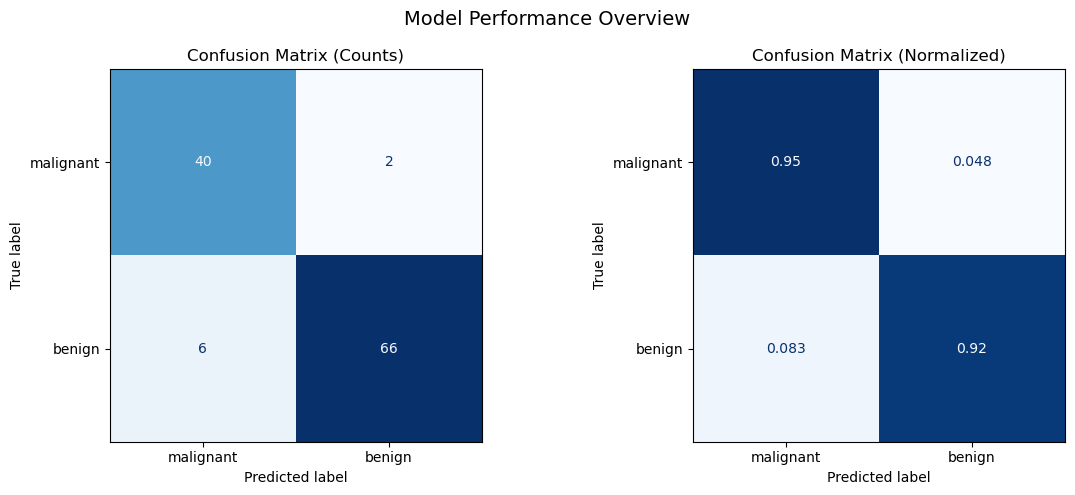

In [32]:
# MODEL EVALUATION
# ===================
print("Evaluating the model on test data...")

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, ConfusionMatrixDisplay
)

# --- Recompute predictions (so this block works standalone) ---
y_pred_prob = model.predict(X_test, verbose=0)
y_pred = (y_pred_prob > 0.5).astype(int).ravel()

# --- Calculate performance metrics ---
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("\n=== PERFORMANCE SUMMARY ===")
print(f"Accuracy : {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall   : {rec:.3f}")
print(f"F1-Score : {f1:.3f}")
print(f"ROC–AUC  : {roc_auc:.3f}")

print("\n Detailed classification report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

# --- Confusion Matrices ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Raw confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred,
    display_labels=data.target_names,
    cmap="Blues",
    ax=axes[0],
    colorbar=False
)
axes[0].set_title("Confusion Matrix (Counts)")

# Normalized confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred,
    display_labels=data.target_names,
    cmap="Blues",
    ax=axes[1],
    colorbar=False,
    normalize="true"
)
axes[1].set_title("Confusion Matrix (Normalized)")

plt.suptitle("Model Performance Overview", fontsize=14)
plt.tight_layout()
plt.show()



=== PERFORMANCE ANALYSIS ===
True Negatives : 40
False Positives: 2
False Negatives: 6
True Positives : 66
Sensitivity (Recall): 0.917
Specificity        : 0.952
Balanced Accuracy  : 0.935
Matthews Corr. Coef: 0.854
Investigating feature importance...


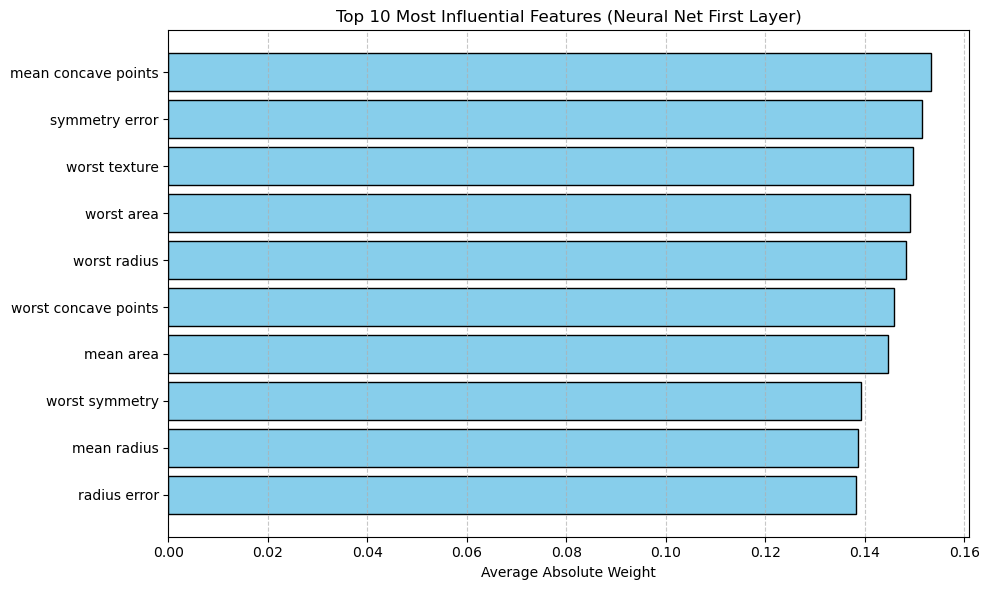

Key Takeaways:
- Overall Accuracy: 93.0%
- Precision: 97.1% → few false positives
- Recall: 91.7% → few false negatives
- Balanced Accuracy: 93.5% → accounts for class imbalance
- MCC: 0.85 → strong indicator of model reliability
- Feature analysis shows which breast cancer characteristics
  had the highest impact on the network’s first layer.


In [38]:
# PERFORMANCE ANALYSIS
# ========================
print("\n=== PERFORMANCE ANALYSIS ===")

from sklearn.metrics import balanced_accuracy_score, matthews_corrcoef

# Confusion matrix elements
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Core diagnostic metrics
sensitivity = tp / (tp + fn)  # same as recall
specificity = tn / (tn + fp)
balanced_acc = balanced_accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

print(f"True Negatives : {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives : {tp}")
print(f"Sensitivity (Recall): {sensitivity:.3f}")
print(f"Specificity        : {specificity:.3f}")
print(f"Balanced Accuracy  : {balanced_acc:.3f}")
print(f"Matthews Corr. Coef: {mcc:.3f}")

# --- Feature importance from first hidden layer ---
print("Investigating feature importance...")

# Extract and aggregate weights
first_layer_weights = model.layers[0].get_weights()[0]
importance_scores = np.abs(first_layer_weights).mean(axis=1)

# Sort features by importance
sorted_idx = np.argsort(importance_scores)[::-1][:10]
sorted_features = [data.feature_names[i] for i in sorted_idx]
sorted_importance = importance_scores[sorted_idx]

# Plot top 10 features using Matplotlib
plt.figure(figsize=(10, 6))
plt.barh(sorted_features[::-1], sorted_importance[::-1], color="skyblue", edgecolor="black")
plt.xlabel("Average Absolute Weight")
plt.title("Top 10 Most Influential Features (Neural Net First Layer)")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# --- Final Summary ---
print("Key Takeaways:")
print(f"- Overall Accuracy: {acc:.1%}")
print(f"- Precision: {prec:.1%} → few false positives")
print(f"- Recall: {rec:.1%} → few false negatives")
print(f"- Balanced Accuracy: {balanced_acc:.1%} → accounts for class imbalance")
print(f"- MCC: {mcc:.2f} → strong indicator of model reliability")
print("- Feature analysis shows which breast cancer characteristics")
print("  had the highest impact on the network’s first layer.")


In [39]:
# SAVE THE MODEL
# ==================
import os

print("\n11. Saving the trained model...")

# Save in HDF5 format
h5_filename = "breast_cancer_nn_model.h5"
model.save(h5_filename)

# Also save in TensorFlow SavedModel format (directory-based)
saved_model_dir = "breast_cancer_nn_savedmodel"
model.save(saved_model_dir, save_format="tf")

# Check file sizes
h5_size = os.path.getsize(h5_filename) / 1024  # KB
print(f"Model saved as '{h5_filename}' ({h5_size:.1f} KB)")

if os.path.isdir(saved_model_dir):
    print(f"Additional SavedModel format stored in '{saved_model_dir}/'")

print("\nHow to load the model later:")
print(f"- From HDF5 file: keras.models.load_model('{h5_filename}')")
print(f"- From SavedModel: keras.models.load_model('{saved_model_dir}')")

print("\n=== PROJECT COMPLETE ===")
print("🎉 Neural network successfully trained and stored!")
print("It can now be reloaded at any time for predictions, further training, or deployment.")



11. Saving the trained model...


ValueError: The `save_format` argument is deprecated in Keras 3. Please remove this argument and pass a file path with either `.keras` or `.h5` extension.Received: save_format=tf